<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Overfitting%20model%20for%20RF-LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from keras.regularizers import l2
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

In [2]:
# Load dataset
dataset = pd.read_csv("dataset_P2.2.csv")
dataset.isnull().sum()

id                   0
dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
Class                0
dtype: int64

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   spkts              175341 non-null  int64  
 3   dpkts              175341 non-null  int64  
 4   sbytes             175341 non-null  int64  
 5   dbytes             175341 non-null  int64  
 6   rate               175341 non-null  float64
 7   sttl               175341 non-null  int64  
 8   dttl               175341 non-null  int64  
 9   sload              175341 non-null  float64
 10  dload              175341 non-null  float64
 11  sloss              175341 non-null  int64  
 12  dloss              175341 non-null  int64  
 13  sinpkt             175341 non-null  float64
 14  dinpkt             175341 non-null  float64
 15  sjit               175341 non-null  float64
 16  dj

In [4]:
encoder = LabelEncoder()
y = encoder.fit_transform(dataset['Class'])
y = np_utils.to_categorical(y, num_classes=10)  # update to 10 classes
X = dataset.drop(['Class'], axis=1)
X = X.values
print(X.shape)
print(y.shape)

(175341, 40)
(175341, 10)


**Data preprocessing**

In [5]:
# Data preprocessing
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Hybrid RF-LSTM for 10 class Ver.2**

Epoch 1/25
14000/14000 [==============================] - 31s 2ms/step - loss: 1962284.1250 - accuracy: 0.1909 - val_loss: 155.1817 - val_accuracy: 0.1445
Epoch 2/25
14000/14000 [==============================] - 29s 2ms/step - loss: 102.6442 - accuracy: 0.1366 - val_loss: 14.9736 - val_accuracy: 0.1306
Epoch 3/25
14000/14000 [==============================] - 29s 2ms/step - loss: 3.5619 - accuracy: 0.1212 - val_loss: 2.2569 - val_accuracy: 0.1181
Epoch 4/25
14000/14000 [==============================] - 30s 2ms/step - loss: 2.8952 - accuracy: 0.1070 - val_loss: 2.2896 - val_accuracy: 0.1045
Epoch 5/25
14000/14000 [==============================] - 31s 2ms/step - loss: 2.4922 - accuracy: 0.1112 - val_loss: 2.3012 - val_accuracy: 0.0997
Epoch 6/25
14000/14000 [==============================] - 31s 2ms/step - loss: 2.3380 - accuracy: 0.1010 - val_loss: 2.3010 - val_accuracy: 0.1000
Epoch 7/25
14000/14000 [==============================] - 32s 2ms/step - loss: 2.4851 - accuracy: 0.1009 - 

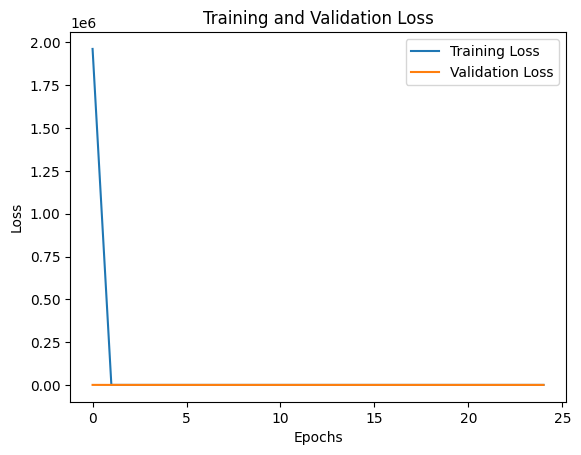

In [15]:
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

# Create a Sequential model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=32)

# Plot the training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.regularizers import l2

# Train RF model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, np.argmax(y_train, axis=1))

# Extract features from RF model
train_rf_features = rf_model.predict_proba(X_train)
test_rf_features = rf_model.predict_proba(X_test)

# Apply L1 regularization (Lasso Regression) for feature selection
lasso_model = LogisticRegression(penalty='l1', solver='saga', multi_class='auto')
feature_selector = SelectFromModel(lasso_model)
train_rf_features = feature_selector.fit_transform(train_rf_features, np.argmax(y_train, axis=1))
test_rf_features = feature_selector.transform(test_rf_features)

# Reshape train_rf_features to 3D array
train_rf_features = np.reshape(train_rf_features, (train_rf_features.shape[0], train_rf_features.shape[1], 1))

Epoch 1/50
14000/14000 [==============================] - 33s 2ms/step - loss: 1897101.7500 - accuracy: 0.1758 - val_loss: 207.0656 - val_accuracy: 0.1306
Epoch 2/50
14000/14000 [==============================] - 33s 2ms/step - loss: 81.5867 - accuracy: 0.1213 - val_loss: 2.3532 - val_accuracy: 0.1207
Epoch 3/50
14000/14000 [==============================] - 31s 2ms/step - loss: 8.8986 - accuracy: 0.1190 - val_loss: 2.2623 - val_accuracy: 0.1198
Epoch 4/50
14000/14000 [==============================] - 32s 2ms/step - loss: 4.5955 - accuracy: 0.1178 - val_loss: 2.2606 - val_accuracy: 0.1169
Epoch 5/50
14000/14000 [==============================] - 33s 2ms/step - loss: 12.9799 - accuracy: 0.1170 - val_loss: 2.3842 - val_accuracy: 0.1187
Epoch 6/50
14000/14000 [==============================] - 33s 2ms/step - loss: 2.5878 - accuracy: 0.1192 - val_loss: 2.2805 - val_accuracy: 0.1187
Epoch 7/50
14000/14000 [==============================] - 32s 2ms/step - loss: 2.2575 - accuracy: 0.1189 - v

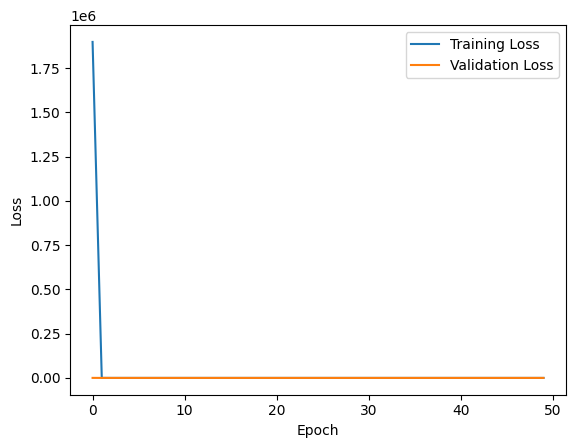

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Train the model and store the history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Plot the training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
# Train LSTM model with RF features as input
lstm_model = Sequential()
lstm_model.add(LSTM(128, input_shape=(train_rf_features.shape[1],1), return_sequences=True, kernel_regularizer=l2(0.02)))
lstm_model.add(Dropout(0.4))
lstm_model.add(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.02)))
lstm_model.add(Dropout(0.4))
lstm_model.add(LSTM(32, kernel_regularizer=l2(0.02)))
lstm_model.add(Dropout(0.4))
lstm_model.add(Dense(10, activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train_rf_features_lstm = np.reshape(train_rf_features, (train_rf_features.shape[0], train_rf_features.shape[1], 1))
test_rf_features_lstm = np.reshape(test_rf_features, (test_rf_features.shape[0], test_rf_features.shape[1], 1))

history = lstm_model.fit(train_rf_features_lstm, y_train, epochs=15, batch_size=64, validation_data=(test_rf_features_lstm, y_test))

Epoch 1/15
7000/7000 [==============================] - 329s 46ms/step - loss: 0.2520 - accuracy: 0.9476 - val_loss: 1.4862 - val_accuracy: 0.8529
Epoch 2/15
7000/7000 [==============================] - 336s 48ms/step - loss: 0.0494 - accuracy: 0.9947 - val_loss: 1.6998 - val_accuracy: 0.8475
Epoch 3/15
7000/7000 [==============================] - 334s 48ms/step - loss: 0.0361 - accuracy: 0.9960 - val_loss: 1.9661 - val_accuracy: 0.8482
Epoch 4/15
7000/7000 [==============================] - 342s 49ms/step - loss: 0.0290 - accuracy: 0.9963 - val_loss: 2.0145 - val_accuracy: 0.8492
Epoch 5/15
  48/7000 [..............................] - ETA: 5:36 - loss: 0.0306 - accuracy: 0.9961

KeyboardInterrupt: ignored

3500/3500 [==============================] - 37s 10ms/step
[[10878    11     0     1    28   320     0    20     6    13]
 [    1  9074   733   775   198    81     0   398     8    75]
 [    0   836  8891   630   148    52     2   571    36    59]
 [    0  1080   895  6392  1645   185    23   816   107    76]
 [    2   341   250  1602  8260   190    14   497    93    48]
 [   44   207   150   267   153 10033     1   222    77    20]
 [    0     6    13    40   113    13 10869    15     3     2]
 [    0   281   483   423   177    56     2  9565   116    26]
 [    0     1     0     1     2    12     1    13 11081     1]
 [    0     0     0     0     7     0     0     0     1 11142]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     11277
           1       0.77      0.80      0.78     11343
           2       0.78      0.79      0.79     11225
           3       0.63      0.57      0.60     11219
           4       0.77      0.73      

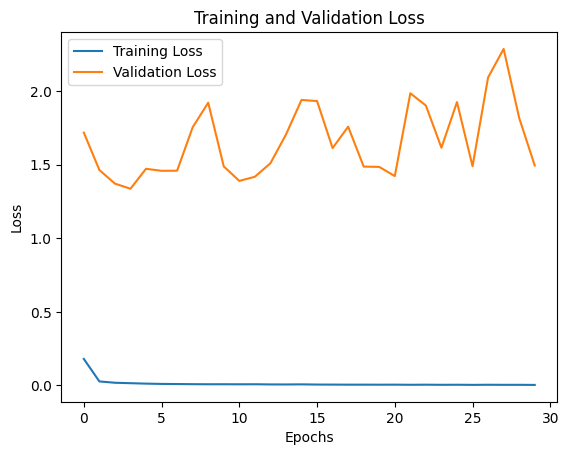

In [12]:
# Evaluate LSTM model on test set
test_lstm_features = lstm_model.predict(test_rf_features_lstm)
test_rf_features_lstm = np.argmax(test_lstm_features, axis=1)

print(confusion_matrix(np.argmax(y_test, axis=1), test_rf_features_lstm))
print(classification_report(np.argmax(y_test, axis=1), test_rf_features_lstm))

# Training and validation loss graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

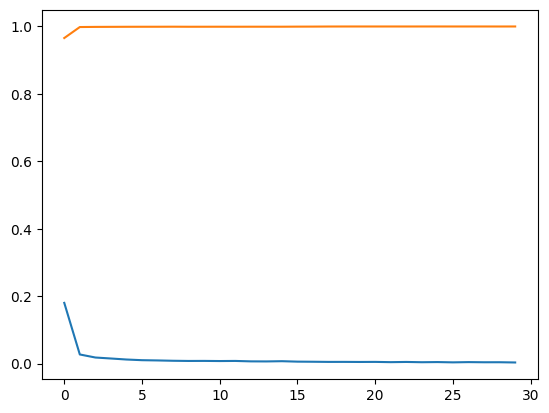

In [13]:
# Plot training loss and validation/test loss over each epoch of training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')